<a href="https://colab.research.google.com/github/natdebandi/migmobs_exploratory/blob/main/1_migration_data_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

## Migration data exploration

**Natalia Debandi**


'ARG', 'CHL', 'BOL', 'VEN'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [11]:
# Filter for countries CHL and ARG
countries_latam = ['CHL', 'ARG','VEN','BOL','PAR','PER','ECU','URY','COL','BRA','SUR']

#target_iso3 country of destiny
countries_target = ['CHL', 'ARG']

#target_iso3 country of origin
countries_origin = ['BOL', 'VEN']


**(1) Stock migration RIKS-CRIS data**

from:
https://riks.cris.unu.edu/annual-bilateral-migration-data


1.1 inmigration_stock


La estimación que usa la base CRIS-UNU consiste en utilizar un modelo bayesiano state-space. En el núcleo del la relación demográfica entre el stock de migrantes, por un lado, y los flujos (brutos), las muertes y los nacimientos, por otro.
El modelo fusiona información dispersa en conjuntos de datos muy diferentes y completa las lagunas entre los años de referencia, que suelen ser múltiples en el caso de los datos migratorios.

https://cris.unu.edu/sites/cris.unu.edu/files/WP22.04%20-%20Standaert%20and%20Rayp_0.pdf

In [12]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df_riks = pd.read_csv(file_path)
print(df_riks.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [13]:
latam_mig_df = df_riks[(df_riks['iso_des'].isin(countries_latam))]
print(latam_mig_df.head())

    iso_or               origin iso_des destination  year  stock  flow  \
436    AAB  Antigua and Barbuda     ARG   Argentina  1960      0   0.0   
437    AAB  Antigua and Barbuda     ARG   Argentina  1961      0   0.0   
438    AAB  Antigua and Barbuda     ARG   Argentina  1962      0   0.0   
439    AAB  Antigua and Barbuda     ARG   Argentina  1963      0   0.0   
440    AAB  Antigua and Barbuda     ARG   Argentina  1964      0   0.0   

     inflow  outflow  
436     NaN      NaN  
437     NaN      NaN  
438     NaN      NaN  
439     NaN      NaN  
440     NaN      NaN  


In [14]:
inmigration_df = latam_mig_df.groupby(['year', 'iso_des'])['stock'].sum().reset_index()
inmigration_df

year iso_des    stock
0    1960     ARG  2683416
1    1960     BOL    43730
2    1960     BRA  1435511
3    1960     CHL   109563
4    1960     COL    62104
..    ...     ...      ...
605  2020     ECU   710469
606  2020     PAR   165475
607  2020     PER  1219978
608  2020     SUR    28048
609  2020     VEN  1325156

[610 rows x 3 columns]

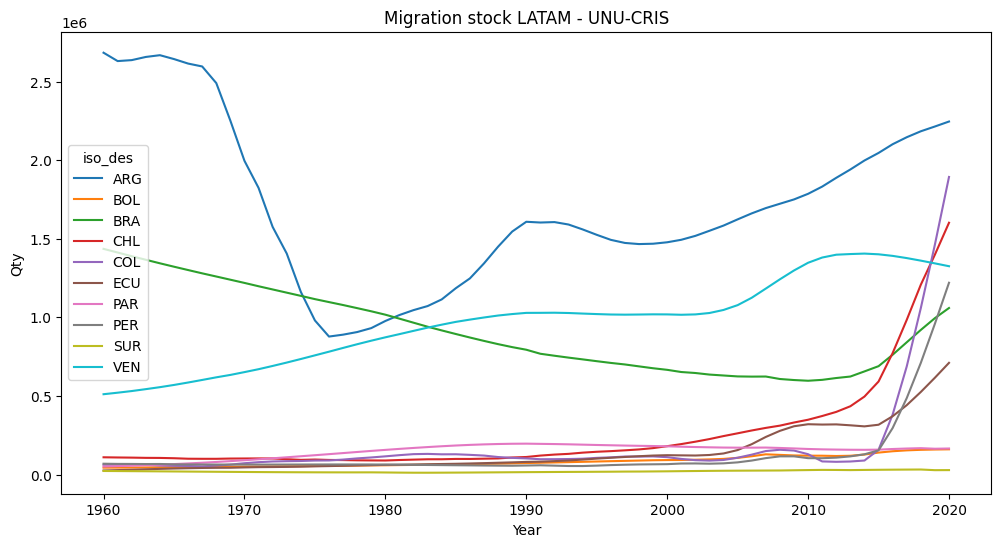

In [15]:

title_plot="Migration stock LATAM - UNU-CRIS"
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=inmigration_df)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()

Venezuela y Argentina mantienen hasta 2015 el mayor stock de migrantes de la región. Se observa como el stock se modifica de manera impresionante a partir de 2015. Esto se vincula definitivamente con la diáspora venezolana.

Sorprende mucho el "bajón" que se observa en los datos de Argentina. Este bajon (que coincide con la etapa de la dictadura Argentina) no se muestra en otros datos oficiales. Vamos a corroborarlo

In [16]:
years_to_filter = [1960, 1970, 1980, 1991, 2001, 2010]

filtered_df = inmigration_df[(inmigration_df['iso_des'] == 'ARG') & (inmigration_df['year'].isin(years_to_filter))]

print(filtered_df.head())


     year iso_des    stock
0    1960     ARG  2683416
100  1970     ARG  1995770
200  1980     ARG   976756
310  1991     ARG  1603133
410  2001     ARG  1493360


Data correction from offical data from CENSUS ARGENTINA

https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1405-74252016000300201



In [17]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/census_data_ARG.csv'

df_census = pd.read_csv(file_path)
print(df_census.head())

  country_code  year    value                indicator          fuente
0          ARG  1960  2604447  inmigration_stock_INDEC  INDEC - Census
1          ARG  1970  2210400  inmigration_stock_INDEC  INDEC - Census
2          ARG  1980  1912217  inmigration_stock_INDEC  INDEC - Census
3          ARG  1991  1628210  inmigration_stock_INDEC  INDEC - Census
4          ARG  2001  1531940  inmigration_stock_INDEC  INDEC - Census


In [18]:
census_data_migration = df_census[df_census['indicator'] == 'inmigration_stock_INDEC']
census_data_migration

country_code  year    value                indicator          fuente
0          ARG  1960  2604447  inmigration_stock_INDEC  INDEC - Census
1          ARG  1970  2210400  inmigration_stock_INDEC  INDEC - Census
2          ARG  1980  1912217  inmigration_stock_INDEC  INDEC - Census
3          ARG  1991  1628210  inmigration_stock_INDEC  INDEC - Census
4          ARG  2001  1531940  inmigration_stock_INDEC  INDEC - Census
5          ARG  2010  1805957  inmigration_stock_INDEC  INDEC - Census
6          ARG  2022  1933463  inmigration_stock_INDEC  INDEC - Census

In [19]:
combined_df = pd.merge(census_data_migration, filtered_df, on='year', how='inner')
combined_df = combined_df.rename(columns={'value': 'census_data', 'stock': 'stock_CRIS'})
combined_df = combined_df[['country_code', 'year', 'census_data', 'stock_CRIS']]

combined_df

country_code  year  census_data  stock_CRIS
0          ARG  1960      2604447     2683416
1          ARG  1970      2210400     1995770
2          ARG  1980      1912217      976756
3          ARG  1991      1628210     1603133
4          ARG  2001      1531940     1493360
5          ARG  2010      1805957     1785826

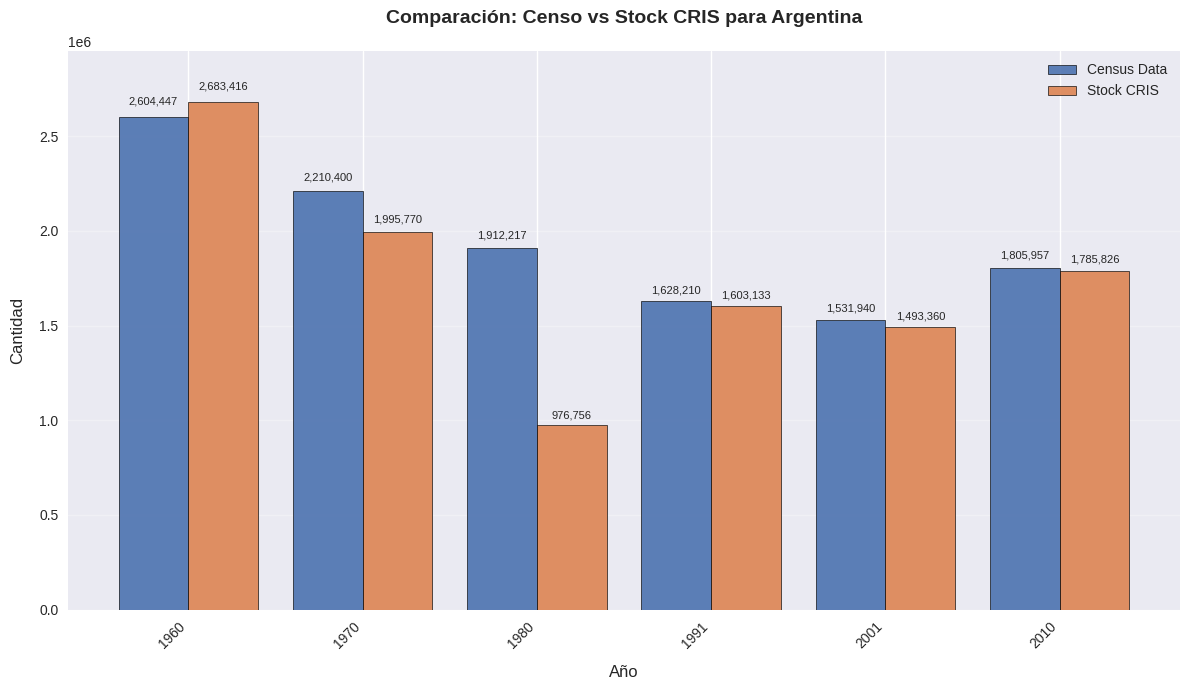

In [20]:

plt.figure(figsize=(12, 7))

# Configuración de estilo
plt.style.use('seaborn-v0_8')  # Usar un estilo más moderno
bar_width = 0.4
opacity = 0.9

# Colores accesibles y atractivos
color_census = '#4C72B0'  # Azul
color_stock = '#DD8452'    # Naranja

# Crear las barras
index = np.arange(len(combined_df['year']))
bars1 = plt.bar(index - bar_width/2, combined_df['census_data'], bar_width,
                alpha=opacity, color=color_census, label='Census Data',
                edgecolor='black', linewidth=0.5)
bars2 = plt.bar(index + bar_width/2, combined_df['stock_CRIS'], bar_width,
                alpha=opacity, color=color_stock, label='Stock CRIS',
                edgecolor='black', linewidth=0.5)

# Mejorar etiquetas y título
plt.xlabel('Año', fontsize=12, labelpad=10)
plt.ylabel('Cantidad', fontsize=12, labelpad=10)
plt.title('Comparación: Censo vs Stock CRIS para Argentina',
          fontsize=14, pad=20, fontweight='bold')

# Formatear ejes
plt.xticks(index, combined_df['year'], rotation=45 if len(index) > 5 else 0,
           ha='right' if len(index) > 5 else 'center', fontsize=10)
plt.yticks(fontsize=10)

# Añadir grid solo en el eje Y para mejor legibilidad
plt.grid(axis='y', alpha=0.3)

# Añadir leyenda en mejor posición
plt.legend(fontsize=10, framealpha=1)

# Añadir valores encima de las barras si el espacio lo permite
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height*1.02,
                f'{height:,.0f}',
                ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)

# Ajustar márgenes
plt.margins(y=0.1)
plt.tight_layout()

plt.show()

La mayor diferencia entre estas fuentes está dada para 1980 donde los datos de CRIS bajan mucho. (habría que enviar consulta)

**1.2	Inmigration stock  - WORLD BANK API **


inmigration_stock_ONU

In [23]:
pip install wbgapi

In [24]:
import wbgapi as wb

In [25]:
mig_stock_onu= wb.data.DataFrame('SM.POP.TOTL', ['ARG', 'CHL'], range(1960, 2022), labels=True)
mig_stock_onu = mig_stock_onu.reset_index()
mig_stock_onu

economy    Country     YR1960  YR1961  YR1962  YR1963  YR1964     YR1965  \
0     CHL      Chile   104805.0     NaN     NaN     NaN     NaN    97551.0   
1     ARG  Argentina  2601188.0     NaN     NaN     NaN     NaN  2409183.0   

   YR1966  YR1967  ...  YR2012  YR2013  YR2014     YR2015  YR2016  YR2017  \
0     NaN     NaN  ...     NaN     NaN     NaN   469436.0     NaN     NaN   
1     NaN     NaN  ...     NaN     NaN     NaN  2086302.0     NaN     NaN   

   YR2018  YR2019  YR2020  YR2021  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  

[2 rows x 64 columns]

In [26]:
mig_stock_onu = mig_stock_onu.melt(id_vars=['economy', 'Country'],
                    value_vars=[col for col in mig_stock_onu.columns if col.startswith('YR')],
                    var_name='year',
                    value_name='mig_stock')

# Limpiar la columna 'YEAR' eliminando el prefijo 'YR'
mig_stock_onu['year'] = mig_stock_onu['year'].str.replace('YR', '')
mig_stock_onu = mig_stock_onu.dropna(subset=['mig_stock'])
# Mostrar las primeras filas de la tabla transformada
print(mig_stock_onu.head())

   economy    Country  year  mig_stock
0      CHL      Chile  1960   104805.0
1      ARG  Argentina  1960  2601188.0
10     CHL      Chile  1965    97551.0
11     ARG  Argentina  1965  2409183.0
20     CHL      Chile  1970    90271.0


In [27]:
mig_stock_onu['year'] = mig_stock_onu['year'].astype(int)
mig_stock_onu['mig_stock'] = mig_stock_onu['mig_stock'].astype(int)
mig_stock_onu_arg = mig_stock_onu[mig_stock_onu['Country'] == 'Argentina']


In [28]:
# Merge combined_df with mig_stock_onu_arg on 'year'
combined_df = pd.merge(combined_df, mig_stock_onu_arg[['year', 'mig_stock']], on='year', how='left')
combined_df = combined_df.rename(columns={'mig_stock': 'stock_ONU'})
combined_df.to_csv('combined_df.csv', index=False)
combined_df


country_code  year  census_data  stock_CRIS  stock_ONU
0          ARG  1960      2604447     2683416  2601188.0
1          ARG  1970      2210400     1995770  2219411.0
2          ARG  1980      1912217      976756  1920798.0
3          ARG  1991      1628210     1603133        NaN
4          ARG  2001      1531940     1493360        NaN
5          ARG  2010      1805957     1785826  1805957.0

** STOCK migration OIM API ***

OIM API Acces

https://www.migrationdataportal.org/

API documentation: https://www.migrationdataportal.org/handbooks/global-migration-data-portal-api-documentation

In [29]:
import requests
base_url = 'https://www.migrationdataportal.org/api/international-values?'
header_ = {'api-key': 'ab0b531fc309ca5080851f5f9101145d'}

In [30]:
params_ = {
     # Specifying the indicators.
    'indicator': 'stock_abs_',
    # Specifying the years for which data is requested.
    'year': '1960+2020'}

Problemas conectandome con el servidor. Los datos son similares al WORLD BANK.

In [32]:
filtered_inmigration_df = inmigration_df[inmigration_df['iso_des'].isin(countries_target)]
filtered_inmigration_df = filtered_inmigration_df.rename(columns={'iso_des': 'country_code'})
filtered_inmigration_df

year country_code    stock
0    1960          ARG  2683416
3    1960          CHL   109563
10   1961          ARG  2630230
13   1961          CHL   108385
20   1962          ARG  2636364
..    ...          ...      ...
583  2018          CHL  1207629
590  2019          ARG  2214059
593  2019          CHL  1399076
600  2020          ARG  2245714
603  2020          CHL  1601702

[122 rows x 3 columns]

In [33]:
combined_df = pd.merge(filtered_inmigration_df, census_data_migration[['year', 'country_code','value']],on=['year', 'country_code'], how='outer')
combined_df

year country_code      stock      value
0    1960          ARG  2683416.0  2604447.0
1    1960          CHL   109563.0        NaN
2    1961          ARG  2630230.0        NaN
3    1961          CHL   108385.0        NaN
4    1962          ARG  2636364.0        NaN
..    ...          ...        ...        ...
118  2019          ARG  2214059.0        NaN
119  2019          CHL  1399076.0        NaN
120  2020          ARG  2245714.0        NaN
121  2020          CHL  1601702.0        NaN
122  2022          ARG        NaN  1933463.0

[123 rows x 4 columns]

Agrego los datos recientes de CHile

In [34]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/stock_chl_2021-2023.csv'

df_2022 = pd.read_csv(file_path)
print(df_2022.head())

   year country_code    value
0  2021          CHL  1630312
1  2022          CHL  1836137
2  2023          CHL  1918583


In [35]:
# prompt: agregar los datos de df_2022 a combined_df

combined_df = pd.concat([combined_df, df_2022], ignore_index=True)


In [36]:
combined_df

year country_code      stock      value
0    1960          ARG  2683416.0  2604447.0
1    1960          CHL   109563.0        NaN
2    1961          ARG  2630230.0        NaN
3    1961          CHL   108385.0        NaN
4    1962          ARG  2636364.0        NaN
..    ...          ...        ...        ...
121  2020          CHL  1601702.0        NaN
122  2022          ARG        NaN  1933463.0
123  2021          CHL        NaN  1630312.0
124  2022          CHL        NaN  1836137.0
125  2023          CHL        NaN  1918583.0

[126 rows x 4 columns]

In [37]:
combined_df = combined_df.rename(columns={'value': 'census_data', 'stock': 'stock_CRIS'})

combined_df = pd.merge(combined_df, mig_stock_onu_arg[['year', 'mig_stock']], on='year', how='left')
combined_df = combined_df.rename(columns={'mig_stock': 'stock_ONU'})
#combined_df.to_csv('combined_df.csv', index=False)
combined_df


year country_code  stock_CRIS  census_data  stock_ONU
0    1960          ARG   2683416.0    2604447.0  2601188.0
1    1960          CHL    109563.0          NaN  2601188.0
2    1961          ARG   2630230.0          NaN        NaN
3    1961          CHL    108385.0          NaN        NaN
4    1962          ARG   2636364.0          NaN        NaN
..    ...          ...         ...          ...        ...
121  2020          CHL   1601702.0          NaN        NaN
122  2022          ARG         NaN    1933463.0        NaN
123  2021          CHL         NaN    1630312.0        NaN
124  2022          CHL         NaN    1836137.0        NaN
125  2023          CHL         NaN    1918583.0        NaN

[126 rows x 5 columns]

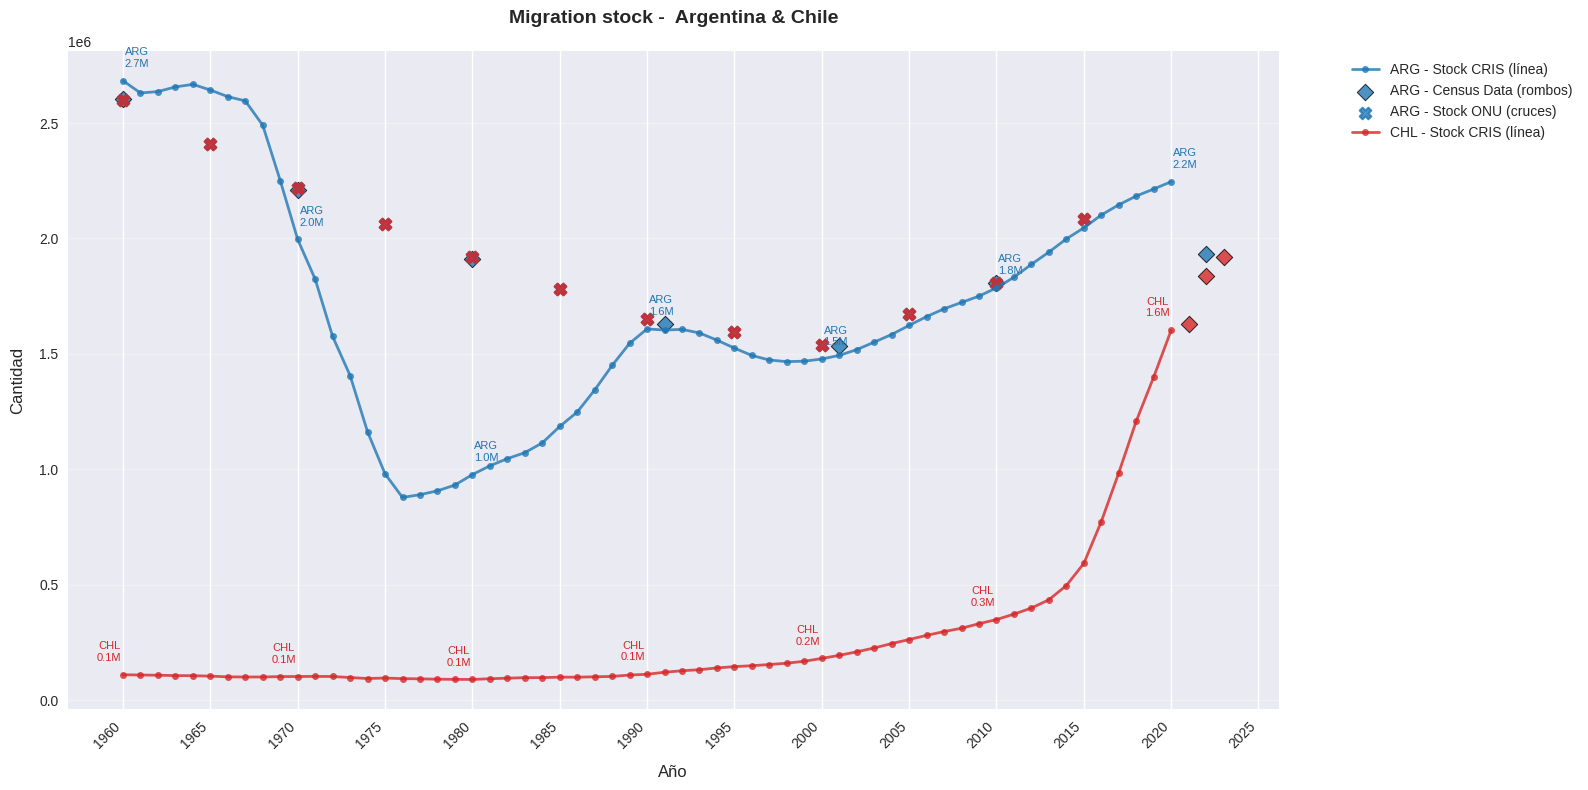

In [38]:
import matplotlib.ticker as ticker


# Configuración del estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16, 8))

# Asumiendo que tu DataFrame tiene una columna 'iso_des' con 'ARG' y 'CHL'
countries = combined_df['country_code'].unique()
colors = {'ARG': '#1f77b4', 'CHL': '#d62728'}  # Azul para ARG, Rojo para CHL
markers = {'census_data': 'D', 'stock_ONU': 'X'}  # Rombo para census, X para ONU

# Crear gráficos para cada país
for country in countries:
    country_df = combined_df[combined_df['country_code'] == country]

    # Línea para stock_CRIS
    plt.plot(country_df['year'], country_df['stock_CRIS'],
            color=colors[country], linewidth=2, marker='o', markersize=5,
            label=f'{country} - Stock CRIS (línea)', alpha=0.8)

    # Puntos para census_data (rombos)
    if 'census_data' in country_df.columns:
        plt.scatter(country_df['year'], country_df['census_data'],
                  color=colors[country], marker=markers['census_data'], s=70,
                  label=f'{country} - Census Data (rombos)' if country == countries[0] else "",
                  edgecolors='black', linewidths=0.7, alpha=0.8)

    # Puntos para stock_ONU (cruces)
    if 'stock_ONU' in country_df.columns:
        plt.scatter(country_df['year'], country_df['stock_ONU'],
                  color=colors[country], marker=markers['stock_ONU'], s=70, linewidth=1.5,
                  label=f'{country} - Stock ONU (cruces)' if country == countries[0] else "",
                  alpha=0.8)

# Personalización del gráfico
plt.title('Migration stock -  Argentina & Chile',
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Año', fontsize=12, labelpad=10)
plt.ylabel('Cantidad', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.3)

# Formatear ejes
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45, ha='right')

# Manejar leyenda para evitar duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Eliminar duplicados
plt.legend(by_label.values(), by_label.keys(), fontsize=10, framealpha=1,
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir anotaciones para años clave (opcional)
key_years = [1960, 1970, 1980, 1990, 2000, 2010, 2020,2022]
for year in key_years:
    if year in combined_df['year'].values:
        for country in countries:
            country_data = combined_df[(combined_df['year'] == year) &
                                     (combined_df['country_code'] == country)]
            if not country_data.empty:
                y_val = country_data['stock_CRIS'].values[0]
                plt.annotate(f'{country}\n{y_val/1e6:.1f}M',
                            (year, y_val),
                            textcoords="offset points", xytext=(10 if country == "ARG" else -10, 10),
                            ha='center', fontsize=8, color=colors[country])

# Ajustar layout
plt.tight_layout()
plt.show()

Agreo manualmente las estimaciones de 2021-2023 del Censo Argentina oficial y de CHILE

In [39]:
#combined_df.to_csv('combined_df.csv', index=False)
combined_df

year country_code  stock_CRIS  census_data  stock_ONU
0    1960          ARG   2683416.0    2604447.0  2601188.0
1    1960          CHL    109563.0          NaN  2601188.0
2    1961          ARG   2630230.0          NaN        NaN
3    1961          CHL    108385.0          NaN        NaN
4    1962          ARG   2636364.0          NaN        NaN
..    ...          ...         ...          ...        ...
121  2020          CHL   1601702.0          NaN        NaN
122  2022          ARG         NaN    1933463.0        NaN
123  2021          CHL         NaN    1630312.0        NaN
124  2022          CHL         NaN    1836137.0        NaN
125  2023          CHL         NaN    1918583.0        NaN

[126 rows x 5 columns]

Agrego una interpolación linear simple para los datos Censales

In [40]:
# Agrego el dato de ONU en la serie del censo para el 2015 para corregir la interpolación
combined_df.loc[combined_df['year'] == 2015, 'census_data'] = combined_df.loc[combined_df['year'] == 2015, 'stock_ONU'].fillna(mig_stock_onu_arg[mig_stock_onu_arg['year'] == 2015]['mig_stock'].iloc[0])


In [41]:
# Ordenar por país y año para asegurar correcta interpolación
combined_df = combined_df.sort_values(['country_code', 'year'])

# Solución garantizada
combined_df['census_data_interpolated'] = combined_df.groupby('country_code')['census_data'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
).round()

print(combined_df[['year', 'country_code', 'census_data', 'census_data_interpolated']])

     year country_code  census_data  census_data_interpolated
0    1960          ARG    2604447.0                 2604447.0
2    1961          ARG          NaN                 2565042.0
4    1962          ARG          NaN                 2525638.0
6    1963          ARG          NaN                 2486233.0
8    1964          ARG          NaN                 2446828.0
..    ...          ...          ...                       ...
119  2019          CHL          NaN                 1782309.0
121  2020          CHL          NaN                 1706310.0
123  2021          CHL    1630312.0                 1630312.0
124  2022          CHL    1836137.0                 1836137.0
125  2023          CHL    1918583.0                 1918583.0

[126 rows x 4 columns]


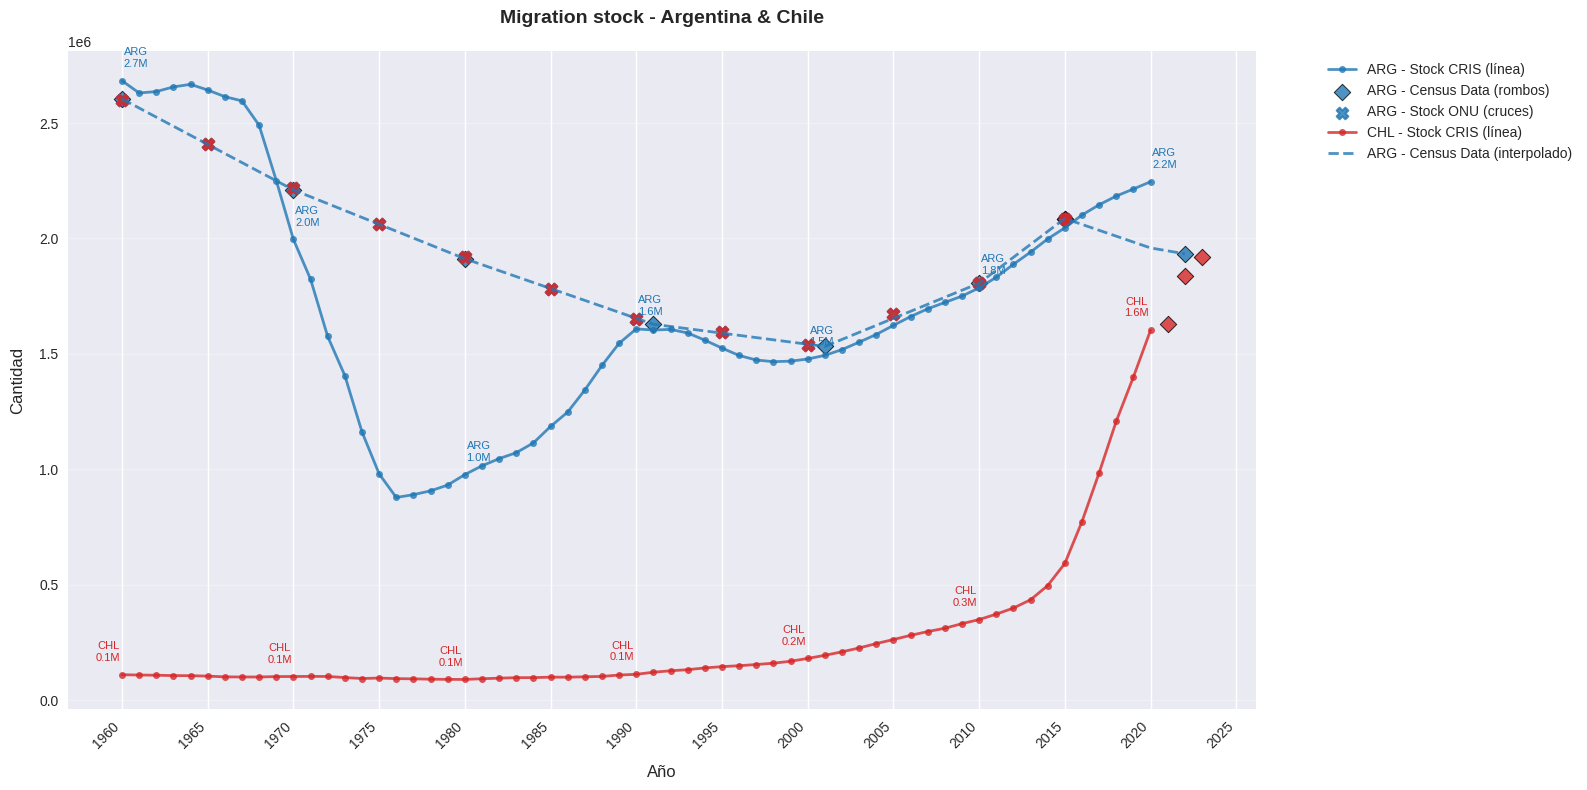

In [42]:
import matplotlib.ticker as ticker

# Configuración del estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16, 8))

# Asumiendo que tu DataFrame tiene una columna 'country_code' con 'ARG' y 'CHL'
countries = combined_df['country_code'].unique()
colors = {'ARG': '#1f77b4', 'CHL': '#d62728'}  # Azul para ARG, Rojo para CHL
markers = {'census_data': 'D', 'stock_ONU': 'X'}  # Rombo para census, X para ONU

# Crear gráficos para cada país
for country in countries:
    country_df = combined_df[combined_df['country_code'] == country]

    # Línea para stock_CRIS
    plt.plot(country_df['year'], country_df['stock_CRIS'],
            color=colors[country], linewidth=2, marker='o', markersize=5,
            label=f'{country} - Stock CRIS (línea)', alpha=0.8)

    # Puntos para census_data (rombos)
    if 'census_data' in country_df.columns:
        plt.scatter(country_df['year'], country_df['census_data'],
                  color=colors[country], marker=markers['census_data'], s=70,
                  label=f'{country} - Census Data (rombos)' if country == countries[0] else "",
                  edgecolors='black', linewidths=0.7, alpha=0.8)

    # Puntos para stock_ONU (cruces)
    if 'stock_ONU' in country_df.columns:
        plt.scatter(country_df['year'], country_df['stock_ONU'],
                  color=colors[country], marker=markers['stock_ONU'], s=70, linewidth=1.5,
                  label=f'{country} - Stock ONU (cruces)' if country == countries[0] else "",
                  alpha=0.8)

# AÑADIDO: Línea para census_data_interpolated solo para ARG
arg_df = combined_df[combined_df['country_code'] == 'ARG']
plt.plot(arg_df['year'], arg_df['census_data_interpolated'],
        color=colors['ARG'], linestyle='--', linewidth=2,
        label='ARG - Census Data (interpolado)', alpha=0.8)

# Personalización del gráfico
plt.title('Migration stock - Argentina & Chile',
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Año', fontsize=12, labelpad=10)
plt.ylabel('Cantidad', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.3)

# Formatear ejes
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45, ha='right')

# Manejar leyenda para evitar duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Eliminar duplicados
plt.legend(by_label.values(), by_label.keys(), fontsize=10, framealpha=1,
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir anotaciones para años clave (opcional)
key_years = [1960, 1970, 1980, 1990, 2000, 2010, 2020, 2022]
for year in key_years:
    if year in combined_df['year'].values:
        for country in countries:
            country_data = combined_df[(combined_df['year'] == year) &
                                     (combined_df['country_code'] == country)]
            if not country_data.empty:
                y_val = country_data['stock_CRIS'].values[0]
                plt.annotate(f'{country}\n{y_val/1e6:.1f}M',
                            (year, y_val),
                            textcoords="offset points", xytext=(10 if country == "ARG" else -10, 10),
                            ha='center', fontsize=8, color=colors[country])

# Ajustar layout
plt.tight_layout()
plt.show()

Voy a corregir los datos de CRIS-ONU para Argentina entre algunos años, sustituyendo el valor por los datos estrapolados.

Lo haré solo para dos períodos

A- 1970-1989

B- 2016-2022

Sustituyo los datos de CHL también despues de 2021. Datos oficiales del censo



In [43]:
inmigration_df.head()

year iso_des    stock
0  1960     ARG  2683416
1  1960     BOL    43730
2  1960     BRA  1435511
3  1960     CHL   109563
4  1960     COL    62104

In [44]:
# Filter the combined_df for Argentina and years 1970-1989
arg_data = combined_df[(combined_df['country_code'] == 'ARG') & (combined_df['year'] >= 1970) & (combined_df['year'] <= 1989)]

# Iterate through the filtered data and update the 'stock' in inmigration_df
for index, row in arg_data.iterrows():
  inmigration_df.loc[(inmigration_df['iso_des'] == 'ARG') & (inmigration_df['year'] == row['year']), 'stock'] = row['census_data_interpolated']


In [45]:
# Filter the combined_df for Argentina and years 1970-1989
arg_data = combined_df[(combined_df['country_code'] == 'ARG') & (combined_df['year'] >= 2016) & (combined_df['year'] <= 2020)]

# Iterate through the filtered data and update the 'stock' in inmigration_df
for index, row in arg_data.iterrows():
  inmigration_df.loc[(inmigration_df['iso_des'] == 'ARG') & (inmigration_df['year'] == row['year']), 'stock'] = row['census_data_interpolated']

In [46]:
combined_df_2022 = combined_df[combined_df['year'] > 2020]
combined_df_2022 = combined_df_2022[['year', 'country_code', 'census_data_interpolated']]

In [47]:
combined_df_2022 = combined_df_2022.rename(columns={'country_code':'iso_des','census_data_interpolated': 'stock'})
inmigration_df = pd.concat([inmigration_df, combined_df_2022], ignore_index=True)


In [48]:
inmigration_df

year iso_des      stock
0    1960     ARG  2683416.0
1    1960     BOL    43730.0
2    1960     BRA  1435511.0
3    1960     CHL   109563.0
4    1960     COL    62104.0
..    ...     ...        ...
609  2020     VEN  1325156.0
610  2022     ARG  1933463.0
611  2021     CHL  1630312.0
612  2022     CHL  1836137.0
613  2023     CHL  1918583.0

[614 rows x 3 columns]

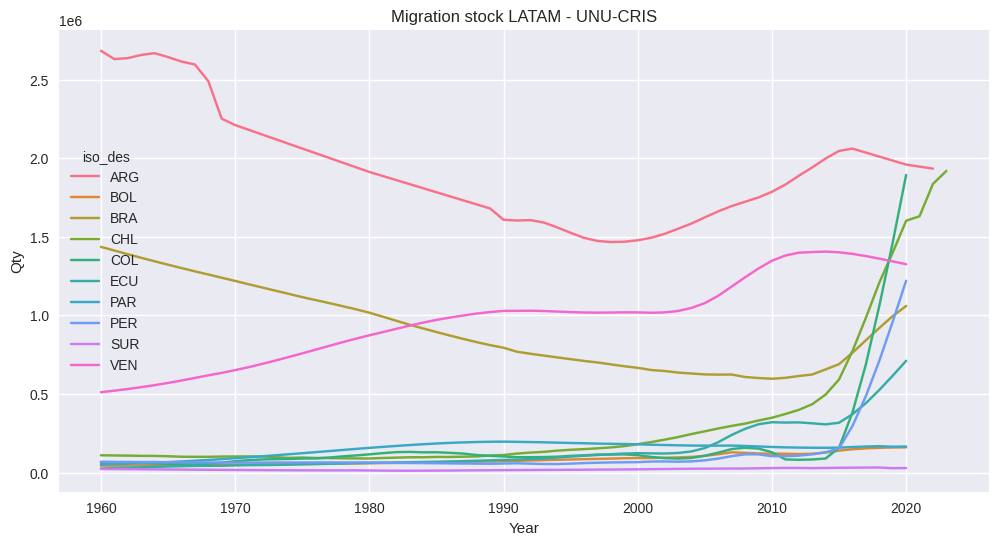

In [49]:
title_plot="Migration stock LATAM - UNU-CRIS"
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=inmigration_df)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()

In [50]:
# prompt: guardar inmigration_df como csv

#inmigration_df.to_csv('inmigration_df.csv', index=False)


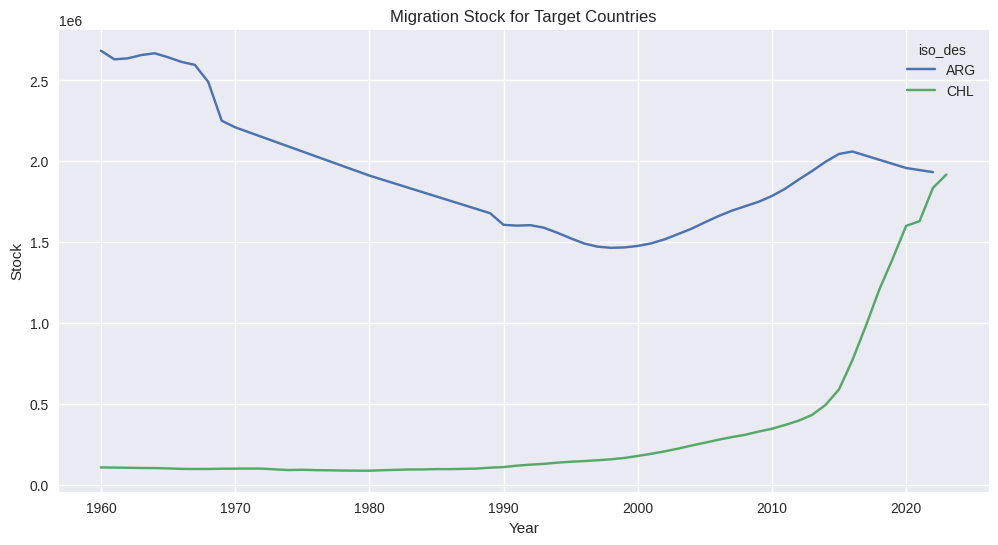

In [51]:
# prompt: Filtrar migration_df para countries_target y hacer un grafico de linea

# Filter the DataFrame
filtered_df = inmigration_df[inmigration_df['iso_des'].isin(countries_target)]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=filtered_df)
plt.title('Migration Stock for Target Countries')
plt.xlabel('Year')
plt.ylabel('Stock')
plt.show()


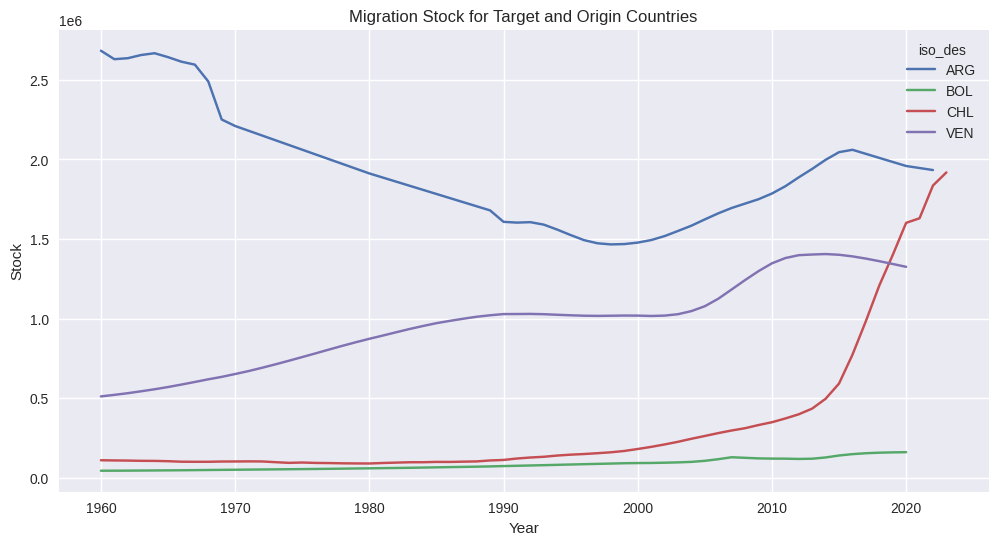

In [52]:
# Filter the DataFrame
filtered_df = inmigration_df[inmigration_df['iso_des'].isin(countries_target + countries_origin)]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=filtered_df)
plt.title('Migration Stock for Target and Origin Countries')
plt.xlabel('Year')
plt.ylabel('Stock')
plt.show()


## Flujos migratorios

**Abel database**

Abel, Guy (2019). Bilateral international migration flow estimates for 200 countries. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4470464


Revisar posibles librerias
https://github.com/guyabel/migest?tab=readme-ov-file


In [53]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/Abel_dataset/bilat_mig_type.csv'

df_abel = pd.read_csv(file_path)
print(df_abel.head())

   year0 orig dest     type  da_min_open  da_min_closed  da_pb_closed
0   1990  BDI  BDI  outward          0.0            0.0           0.0
1   1990  BDI  BDI   return          0.0            0.0           0.0
2   1990  BDI  BDI  transit          0.0            0.0           0.0
3   1990  COM  BDI  outward          0.0            0.0           0.0
4   1990  COM  BDI   return          0.0            0.0           0.0


In [56]:
latam_df = df_abel[
    df_abel['orig'].isin(countries_latam) & df_abel['dest'].isin(countries_latam)
]

df_abel['year0'] = df_abel['year0'].astype(int)


df_abel = df_abel.rename(columns={'year0':'year'})

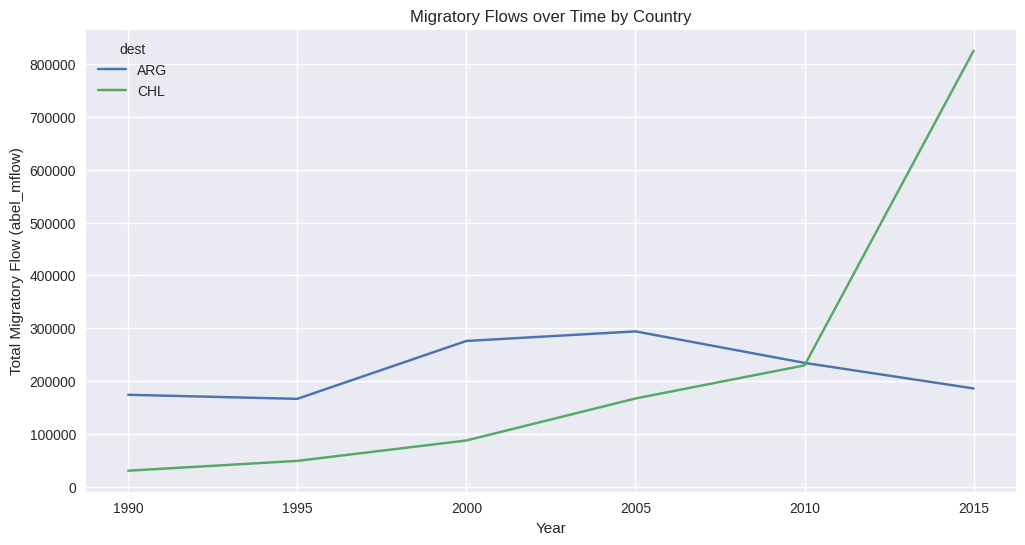

In [57]:
# Group by 'iso3code_j' and 'year', summing 'abel_mflow'
countries_df = df_abel[df_abel['dest'].isin(countries_target)]

grouped_df = countries_df.groupby(['dest', 'year'])['da_min_closed'].sum().reset_index()

# Assuming 'year' is a column in your DataFrame
grouped_df['year'] = grouped_df['year'].astype(int)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='da_min_closed', hue='dest', data=grouped_df)
plt.title('Migratory Flows over Time by Country')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.show()

**GTM2 - Abel flows data**

Global_Transnational_Mobility_dataset v2 (2025)

In [59]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/GTMD2/GTMD2_Data_MIGMOBS_share.csv'

mobility_df = pd.read_csv(file_path)
countries_df = mobility_df[mobility_df['iso3code_j'].isin(countries_target)]

latam_df = mobility_df[
    mobility_df['iso3code_j'].isin(countries_latam) & mobility_df['iso3code_i'].isin(countries_latam)
]

mobility_df['year'] = mobility_df['year'].astype(int)

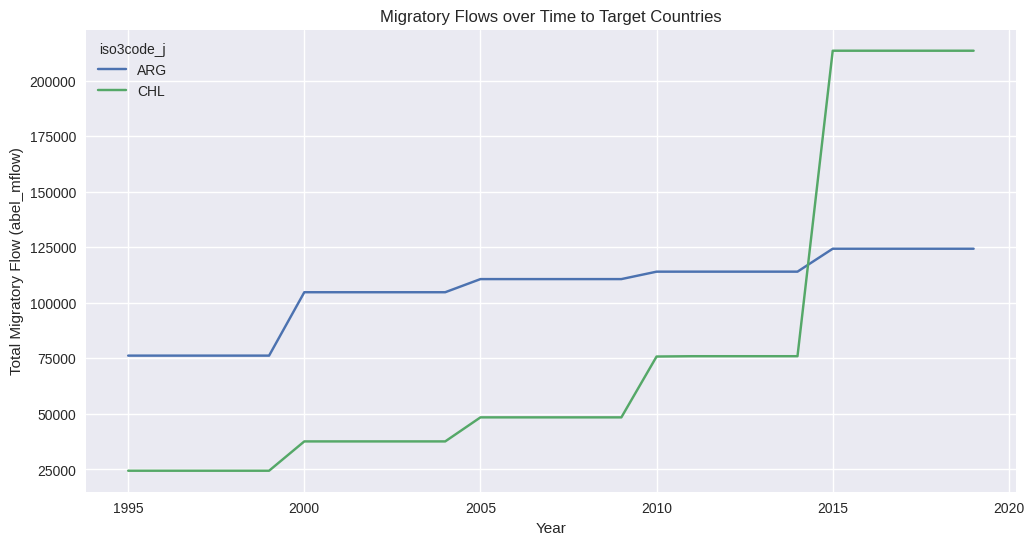

In [60]:
# Group by 'iso3code_j' and 'year', summing 'abel_mflow'
grouped_df = countries_df.groupby(['iso3code_j', 'year'])['abel_mflow'].sum().reset_index()
grouped_df = grouped_df[grouped_df['year'] <= 2019]

# Assuming 'year' is a column in your DataFrame
grouped_df['year'] = grouped_df['year'].astype(int)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='abel_mflow', hue='iso3code_j', data=grouped_df)
plt.title('Migratory Flows over Time to Target Countries')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.show()

Reviso la base de CRIS-UNU con datos de flows

In [61]:
latam_mig_df

iso_or               origin iso_des destination  year  stock  flow  \
436        AAB  Antigua and Barbuda     ARG   Argentina  1960      0   0.0   
437        AAB  Antigua and Barbuda     ARG   Argentina  1961      0   0.0   
438        AAB  Antigua and Barbuda     ARG   Argentina  1962      0   0.0   
439        AAB  Antigua and Barbuda     ARG   Argentina  1963      0   0.0   
440        AAB  Antigua and Barbuda     ARG   Argentina  1964      0   0.0   
...        ...                  ...     ...         ...   ...    ...   ...   
2889341    ZIM             Zimbabwe     VEN   Venezuela  2016     15   0.0   
2889342    ZIM             Zimbabwe     VEN   Venezuela  2017     14  -1.0   
2889343    ZIM             Zimbabwe     VEN   Venezuela  2018     14   0.0   
2889344    ZIM             Zimbabwe     VEN   Venezuela  2019     13  -1.0   
2889345    ZIM             Zimbabwe     VEN   Venezuela  2020     13   0.0   

         inflow  outflow  
436         NaN      NaN  
437         NaN      NaN  
438         NaN      NaN  
439         NaN      NaN  
440         NaN      NaN  
...         ...      ...  
2889341     NaN      NaN  
2889342     NaN      NaN  
2889343     NaN      NaN  
2889344     NaN      NaN  
2889345     NaN      NaN  

[131422 rows x 9 columns]

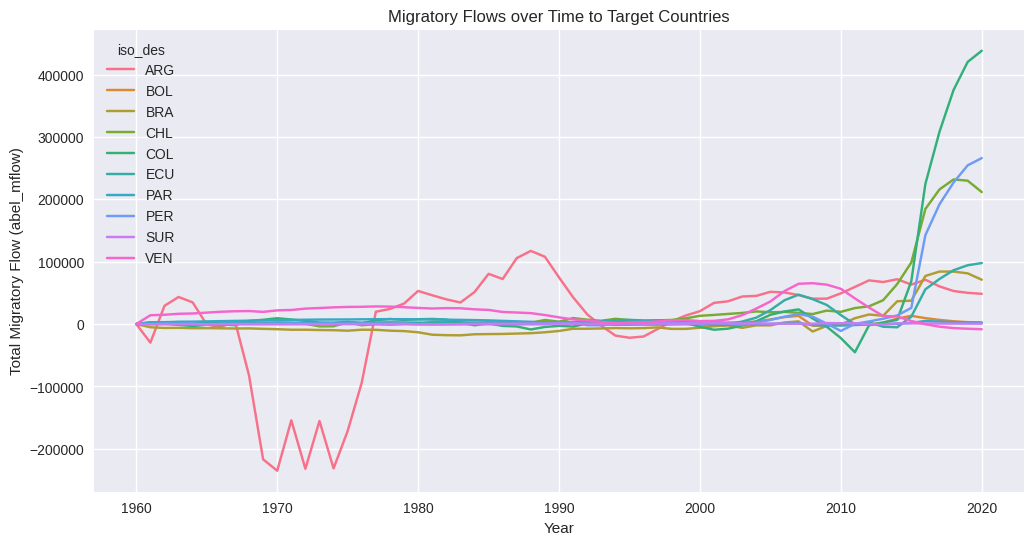

In [62]:
# Group data by year and iso_des, then sum the 'inflow' column
grouped_df = latam_mig_df.groupby(['year', 'iso_des'])['flow'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='flow', hue='iso_des', data=grouped_df)
plt.title('Migratory Flows over Time to Target Countries')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.show()

Solo los flujos intra-regionales

Desde cualquier pais de LATAM a cualquier pais de LATAM

In [63]:
# prompt: latam_mig_df filtro que iso_or este en countries_Latam

latam_mig_df_intraregional = latam_mig_df[(latam_mig_df['iso_or'].isin(countries_latam))]


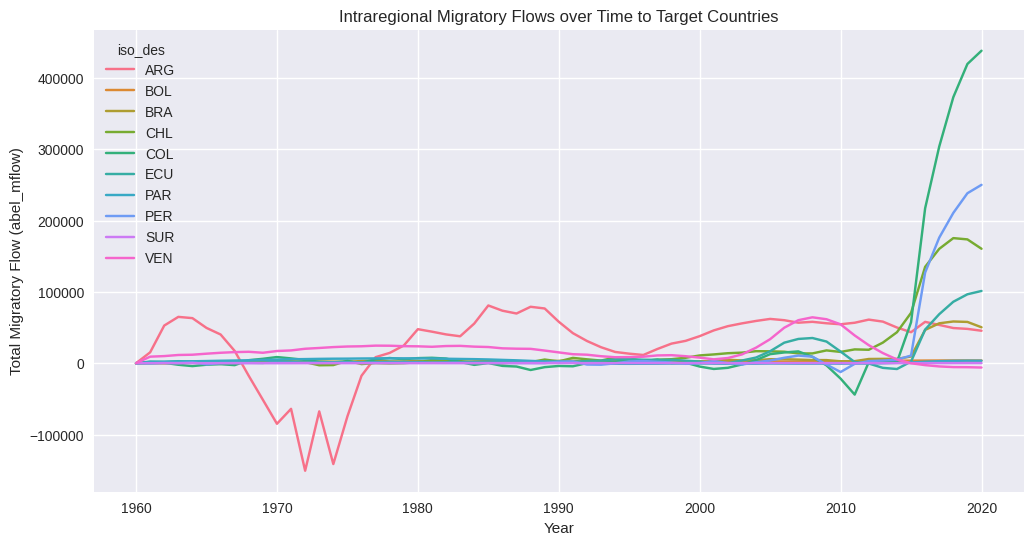

In [64]:
# Group data by year and iso_des, then sum the 'inflow' column
grouped_df = latam_mig_df_intraregional.groupby(['year', 'iso_des'])['flow'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='flow', hue='iso_des', data=grouped_df)
plt.title('Intraregional Migratory Flows over Time to Target Countries')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.show()

La curva de Argentina arrastra el mismo problema que los datos de Stock pero no tengo como ajustarlos facilmente

In [65]:
pip install holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
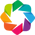

In [66]:
import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')

CHORD diagramas - Datos de ABEL (GTMD2)

In [67]:
latam_mig_df_intraregional

iso_or     origin iso_des destination  year  stock   flow  inflow  \
111792     ARG  Argentina     BOL     Bolivia  1960   4306    NaN     NaN   
111793     ARG  Argentina     BOL     Bolivia  1961   4835  627.0     NaN   
111794     ARG  Argentina     BOL     Bolivia  1962   5361  634.0     NaN   
111795     ARG  Argentina     BOL     Bolivia  1963   5895  651.0     NaN   
111796     ARG  Argentina     BOL     Bolivia  1964   6435  667.0     NaN   
...        ...        ...     ...         ...   ...    ...    ...     ...   
2797271    VEN  Venezuela     SUR    Suriname  2014      1    0.0     NaN   
2797272    VEN  Venezuela     SUR    Suriname  2015      1    0.0     NaN   
2797273    VEN  Venezuela     SUR    Suriname  2016      0   -1.0     NaN   
2797274    VEN  Venezuela     SUR    Suriname  2017      0    0.0     NaN   
2797275    VEN  Venezuela     SUR    Suriname  2018      0    0.0     NaN   

         outflow  
111792       NaN  
111793       NaN  
111794       NaN  
111795       NaN  
111796       NaN  
...          ...  
2797271      NaN  
2797272      NaN  
2797273      NaN  
2797274      NaN  
2797275      NaN  

[5454 rows x 9 columns]

In [68]:
# subset
latam_df_subset = latam_df[['iso3code_j', 'iso3code_i', 'year', 'abel_mflow']]
latam_df_subset = latam_df_subset.dropna(subset=['abel_mflow'])  # Eliminar filas con valores nulos en abel_mflow
latam_df_subset['abel_mflow'] = pd.to_numeric(latam_df_subset['abel_mflow'], errors='coerce')  # Convertir a numérico, coercer errores
latam_df_subset = latam_df_subset.dropna(subset=['abel_mflow'])  # Eliminar posibles nuevos NaN tras la conversión


# Filtrar para los años seleccionados
# Años a visualizar
years = [1995, 2010, 2019]

In [69]:
# Crear visualizaciones para cada año
chords = []
for year in years:
    year_df = latam_df_subset[latam_df_subset['year'] == year]
    matrix = year_df.pivot_table(index='iso3code_i', columns='iso3code_j',
                                values='abel_mflow', aggfunc='sum').fillna(0)

    # Convertir a formato largo para HoloViews
    links = matrix.stack().reset_index()
    links.columns = ['source', 'target', 'value']
    links = links[links['value'] > 0]  # Filtrar conexiones con flujo

    # Crear el Chord diagram con opciones correctamente aplicadas
    chord = hv.Chord(links).select(value=(5, None))

    # Aplicar opciones en el formato correcto
    chord.opts(
        title=f'Flujos Migratorios {year}',
        cmap='Category20',
        edge_cmap='Category20',
        edge_color=dim('source').str(),
        labels='index',
        node_color=dim('index').str(),
        width=400,
        height=400,
        label_text_font_size='10pt',
        edge_alpha=0.8,
        node_line_color='black',
        tools=['hover'],
        toolbar='above'
    )

    chords.append(chord)

# Organizar en una fila
layout = hv.Layout(chords).cols(3)

# Mostrar el resultado
layout

:Layout
   .Chord.I   :Chord   [source,target]   (value)
   .Chord.II  :Chord   [source,target]   (value)
   .Chord.III :Chord   [source,target]   (value)

CHORD diagrams - CRIS-UNU flows

In [70]:
# subset
latam_df_subset2 = latam_mig_df_intraregional[['iso_des', 'iso_or', 'year', 'flow']]
latam_df_subset2 = latam_df_subset2.dropna(subset=['flow'])  # Eliminar filas con valores nulos en abel_mflow
latam_df_subset2['flow'] = pd.to_numeric(latam_df_subset2['flow'], errors='coerce')  # Convertir a numérico, coercer errores
latam_df_subset2 = latam_df_subset2.dropna(subset=['flow'])  # Eliminar posibles nuevos NaN tras la conversión


# Filtrar para los años seleccionados
# Años a visualizar
years = [1995, 2010, 2019]


In [71]:
# Crear visualizaciones para cada año
chords = []
for year in years:
    year_df = latam_df_subset2[latam_df_subset2['year'] == year]
    matrix = year_df.pivot_table(index='iso_or', columns='iso_des',
                                values='flow', aggfunc='sum').fillna(0)

    # Convertir a formato largo para HoloViews
    links = matrix.stack().reset_index()
    links.columns = ['source', 'target', 'value']
    links = links[links['value'] > 0]  # Filtrar conexiones con flujo

    # Crear el Chord diagram con opciones correctamente aplicadas
    chord = hv.Chord(links).select(value=(5, None))

    # Aplicar opciones en el formato correcto
    chord.opts(
        title=f'Flujos Migratorios {year}',
        cmap='Category20',
        edge_cmap='Category20',
        edge_color=dim('source').str(),
        labels='index',
        node_color=dim('index').str(),
        width=400,
        height=400,
        label_text_font_size='10pt',
        edge_alpha=0.8,
        node_line_color='black',
        tools=['hover'],
        toolbar='above'
    )

    chords.append(chord)

# Organizar en una fila
layout = hv.Layout(chords).cols(3)

# Mostrar el resultado
layout

:Layout
   .Chord.I   :Chord   [source,target]   (value)
   .Chord.II  :Chord   [source,target]   (value)
   .Chord.III :Chord   [source,target]   (value)

Revision de ingresos administrativos

In [73]:

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/registros_migratorios.csv'

df_admin = pd.read_csv(file_path)


In [76]:
df_admin


country_code  year   value origin       variable_name  \
0            ARG  2011  428566    BOL  entries_mouvements   
1            ARG  2012  367350    BOL  entries_mouvements   
2            ARG  2013  468087    BOL  entries_mouvements   
3            ARG  2014  660969    BOL  entries_mouvements   
4            ARG  2015  861513    BOL  entries_mouvements   
..           ...   ...     ...    ...                 ...   
380          CHL  2019  149889  Total  permante_residence   
381          CHL  2020   57618  Total  permante_residence   
382          CHL  2021   51906  Total  permante_residence   
383          CHL  2022   89659  Total  permante_residence   
384          CHL  2023  213522  Total  permante_residence   

                       indicator  fuente  
0    Migration entries movements     DNM  
1    Migration entries movements     DNM  
2    Migration entries movements     DNM  
3    Migration entries movements     DNM  
4    Migration entries movements     DNM  
..                           ...     ...  
380          Permanent residence  SERMIG  
381          Permanent residence  SERMIG  
382          Permanent residence  SERMIG  
383          Permanent residence  SERMIG  
384          Permanent residence  SERMIG  

[385 rows x 7 columns]

In [74]:

print(df_admin['variable_name'].unique())

['entries_mouvements' 'exits_mouvements' 'permante_residence'
 'temporary_residence']


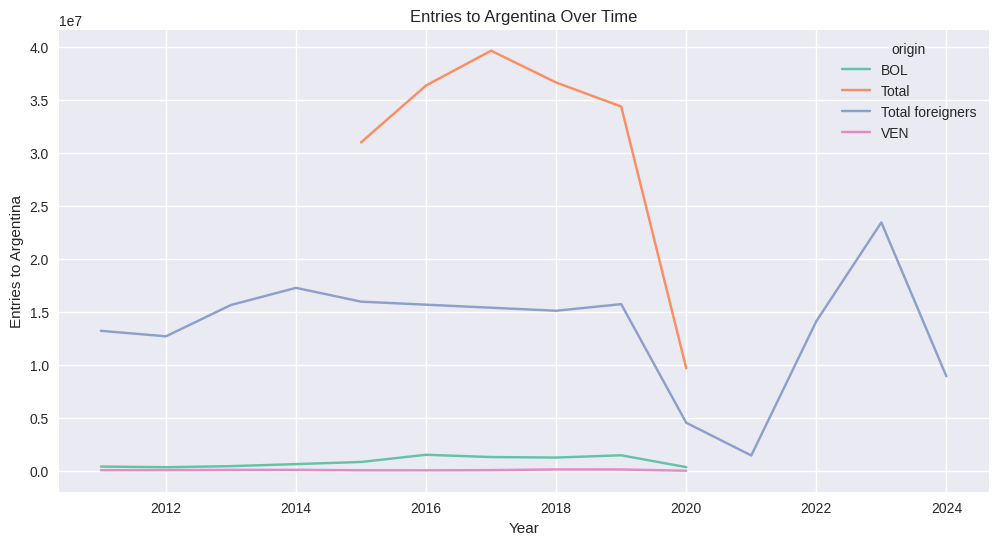

In [77]:
df_entries = df_admin[df_admin['variable_name'] == 'entries_mouvements']
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='origin', data=df_entries, palette = "Set2")
plt.title('Entries to Argentina Over Time')
plt.xlabel('Year')
plt.ylabel('Entries to Argentina')
plt.show()

**Residencias permanentes - ARG y CHL**

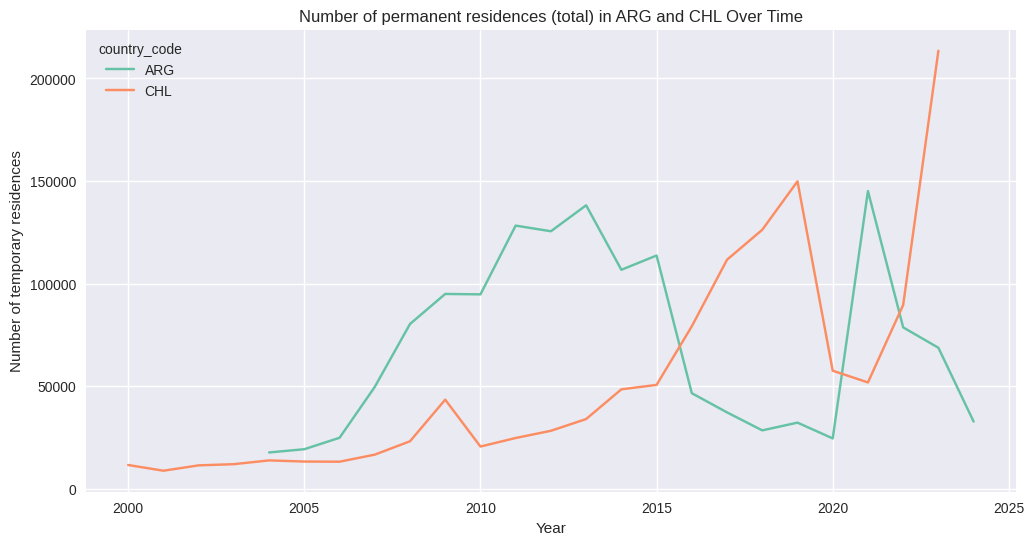

In [90]:

df_residences_temp = df_admin[(df_admin['variable_name'] == 'permante_residence') &
                                  (df_admin['origin']=='Total')]
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_code', data=df_residences_temp, palette = "Set2")
plt.title('Number of permanent residences (total) in ARG and CHL Over Time')
plt.xlabel('Year')
plt.ylabel('Number of temporary residences')
plt.show()


Residencias temporarias ARG y CHL

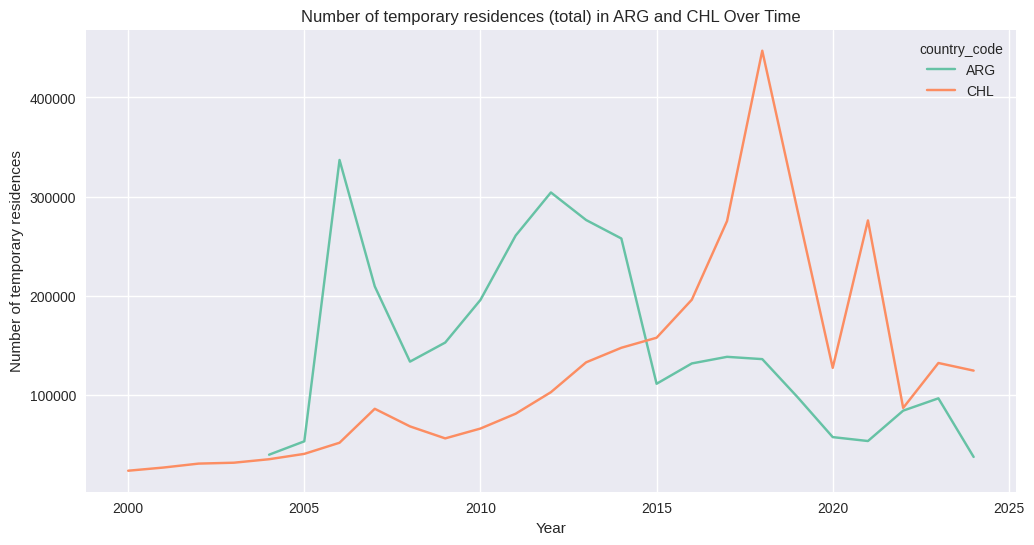

In [91]:
df_residences_temp = df_admin[(df_admin['variable_name'] == 'temporary_residence') &
                                  (df_admin['origin']=='Total')]
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_code', data=df_residences_temp, palette = "Set2")
plt.title('Number of temporary residences (total) in ARG and CHL Over Time')
plt.xlabel('Year')
plt.ylabel('Number of temporary residences')
plt.show()


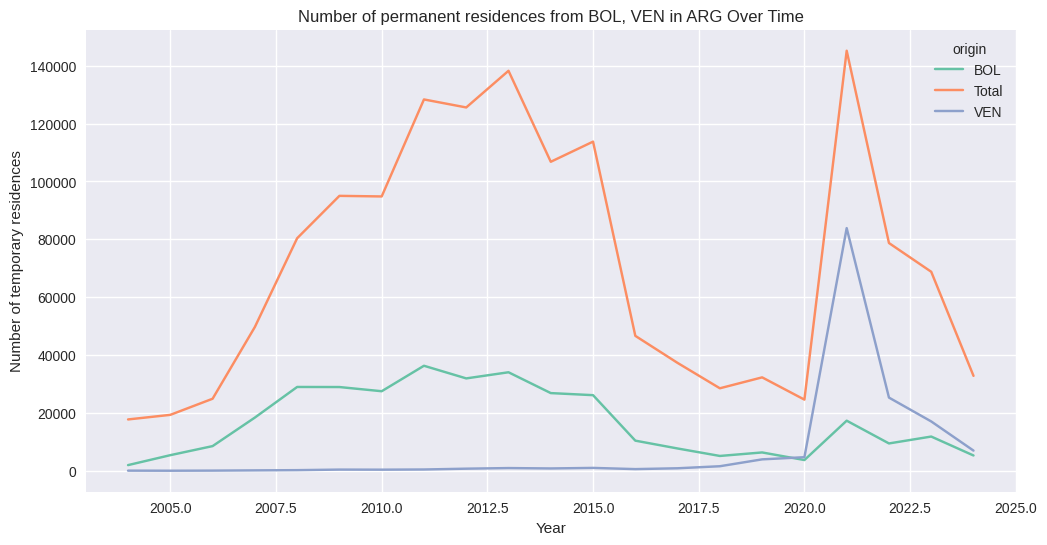

In [94]:
df_residences_temp = df_admin[(df_admin['variable_name'] == 'permante_residence') &
                                  (df_admin['country_code']=='ARG')]

df_admin['year'] = df_admin['year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='origin', data=df_residences_temp, palette = "Set2")
plt.title('Number of permanent residences from BOL, VEN in ARG Over Time')
plt.xlabel('Year')
plt.ylabel('Number of temporary residences')
plt.show()


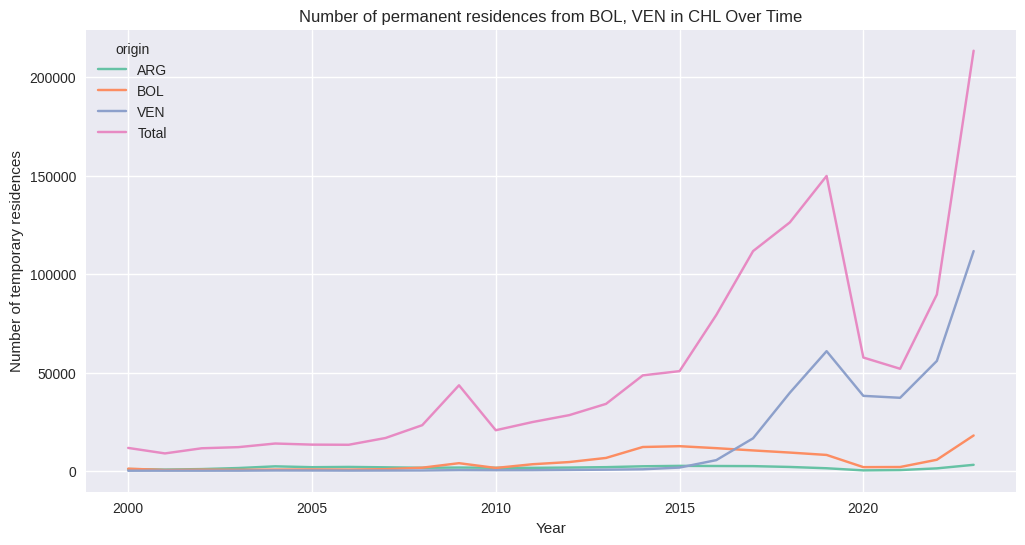

In [95]:
df_residences_temp = df_admin[(df_admin['variable_name'] == 'permante_residence') &
                                  (df_admin['country_code']=='CHL')]

df_admin['year'] = df_admin['year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='origin', data=df_residences_temp, palette = "Set2")
plt.title('Number of permanent residences from BOL, VEN in CHL Over Time')
plt.xlabel('Year')
plt.ylabel('Number of temporary residences')
plt.show()